<a href="https://colab.research.google.com/github/anilkumarpanda/Santander-Customer-Transaction-Prediction/blob/master/Kaggle_Satander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install Kaggle Packages
#!pip install kaggle
!pip install catboost

    100% |████████████████████████████████| 60.1MB 535kB/s 


In [0]:
#Import Keys
#!mv /root/kaggle.json /root/.kaggle/
#!chmod 600 /root/.kaggle/kaggle.json
#Download Datasets
#!kaggle competitions download -c santander-customer-transaction-prediction
#!unzip test.csv.zip
#!unzip train.csv.zip
#!rm -rf *.zip
!mkdir data
!mv *.csv data/

In [0]:
import pandas as pd

In [0]:
print("Hello Google")
pwd=!pwd
print("Working in directory {}".format(pwd))

Hello Google
Working in directory ['/content']


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [0]:
# for get better result chage fold_n to 5
fold_n=5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

In [34]:
print(os.listdir("data/"))
# import Dataset to play with it
train= pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')

['train.csv', 'sample_submission.csv', 'test.csv']


In [35]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [36]:
train.shape, test.shape, sample_submission.shape

((200000, 202), (200000, 201), (200000, 2))

In [37]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,...,200000.000000000000000,200000.000000000000000,200000.00000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000,200000.000000000000000
mean,0.100490000000000,10.679914252000151,-1.627621689499992,10.715191851000073,6.796529157000018,11.078333240500118,-5.065317493499968,5.408948681499958,16.545849889500108,0.284161849999996,...,3.234439775999965,7.438408337000044,1.92783851400003,3.331773684500021,17.993784182999992,-0.142088433500005,2.303335243500019,8.908157683499990,15.870720248000522,-3.326536900499999
std,0.300652975806355,3.040050870668801,4.050044189955011,2.640894191799927,2.043319016359718,1.623149533936866,7.863266683476754,0.866607266216908,3.418075578937139,3.332633536717585,...,4.559921679910722,3.023271794723963,1.47842289233660,3.992030367901846,3.135161996426620,1.429372364408401,5.454369250069321,0.921625484493855,3.010945491221765,10.438015107352546
min,0.000000000000000,0.408400000000000,-15.043400000000000,2.117100000000000,-0.040200000000000,5.074800000000000,-32.562600000000003,2.347300000000000,5.349700000000000,-10.505500000000000,...,-14.093299999999999,-2.691700000000000,-3.81450000000000,-11.783400000000000,8.694400000000000,-5.261000000000000,-14.209600000000000,5.960600000000000,6.299300000000000,-38.852800000000002
25%,0.000000000000000,8.453850000000001,-4.740025000000000,8.722474999999999,5.254075000000000,9.883175000000000,-11.200350000000000,4.767700000000000,13.943800000000000,-2.317800000000000,...,-0.058825000000000,5.157400000000000,0.88977500000000,0.584600000000000,15.629799999999999,-1.170700000000000,-1.946925000000000,8.252800000000001,13.829700000000001,-11.208475000000000
50%,0.000000000000000,10.524750000000001,-1.608050000000000,10.580000000000000,6.825000000000000,11.108250000000000,-4.833150000000000,5.385100000000000,16.456800000000001,0.393700000000000,...,3.203600000000000,7.347750000000000,1.90130000000000,3.396350000000000,17.957949999999997,-0.172700000000000,2.408900000000000,8.888199999999999,15.934050000000001,-2.819550000000000
75%,0.000000000000000,12.758200000000000,1.358625000000000,12.516700000000000,8.324100000000000,12.261125000000002,0.924800000000000,6.002999999999999,19.102900000000002,2.937900000000000,...,6.406200000000000,9.512525000000000,2.94950000000000,6.205800000000000,20.396524999999997,0.829600000000000,6.556725000000000,9.593299999999999,18.064724999999999,4.836800000000000
max,1.000000000000000,20.315000000000001,10.376799999999999,19.352999999999998,13.188300000000000,16.671399999999998,17.251600000000000,8.447699999999999,27.691800000000001,10.151300000000001,...,18.440899999999999,16.716500000000000,8.40240000000000,18.281800000000000,27.928799999999999,4.272900000000000,18.321500000000000,12.000400000000001,26.079100000000000,28.500699999999998


In [0]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            
            # Print current column type
            #print("******************************")
            #print("Column: ",col)
            #print("dtype before: ",df[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            #print("dtype after: ",df[col].dtype)
            #print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [39]:
train, NAlist = reduce_mem_usage(train)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 308.2276153564453  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  154.30458068847656  MB
This is  50.06189354903625 % of the initial size
_________________

_________________

[]


In [40]:
test, NAlist = reduce_mem_usage(test)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 306.7017364501953  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  154.1138458251953  MB
This is  50.248768594833685 % of the initial size
_________________

_________________

[]


In [42]:
check_missing_data(train)
check_missing_data(test)

False

Prepare Data for Modelling

In [0]:
#Divide into train and test
cols=["target","ID_code"]
X = train.drop(cols,axis=1)
y = train["target"]
X_test  = test.drop("ID_code",axis=1)

validation_size = 0.20
seed = 33

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(rescaledX,y,test_size=validation_size,random_state=seed)

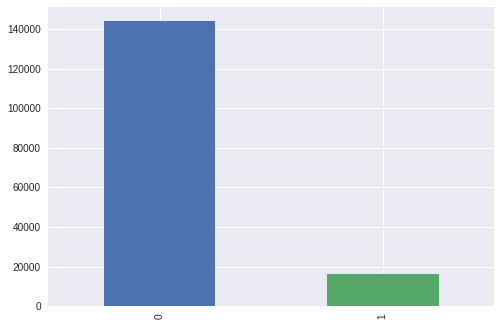

In [48]:
y_train.value_counts().plot.bar();

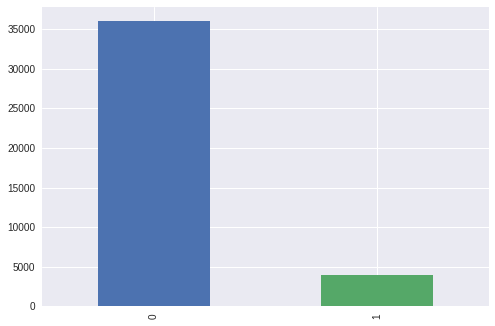

In [49]:
y_test.value_counts().plot.bar();

## KMeans Clustering to find clusters of similar customers .

In [0]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(16,40,2)
for k in K:
    print("Using K {} clusters".format(k))
    if k in [20,26,32]:
      plt.plot(K, Sum_of_squared_distances,'bx-')
      plt.xlabel('k')
      plt.ylabel('Sum_of_squared_distances')
      plt.title('Elbow Method For Optimal k')
      plt.show()
    km = KMeans(n_clusters=k)
    km = km.fit(rescaledX)
    Sum_of_squared_distances.append(km.inertia_)

Using K 16 clusters
Using K 18 clusters
